In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
import os

In [3]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
def fun_cal(x,y,x_a,y_b,x_c,y_d):
    s = math.exp(-((((x+x_a)**2)/x_c)+(((y+y_b)**2)/y_d)))
    return s
fun=np.vectorize(fun_cal)

In [5]:
############################################# Stochastic Search start ################################################
def stochastic_Search(Smin,Smax,popSize,nRRI,nRRC,radius,maxItr):
    x_min=Smin[0]
    x_max=Smax[0]
    y_min=Smin[1]
    y_max=Smax[1]
    
    
    ############################################## Random Point Selection ##########################################
    X_rand=np.random.randint(-10,10, popSize)
    Y_rand=np.random.randint(-10,10, popSize)
    P_t=np.array([X_rand,Y_rand])
    fig=plt.figure(figsize=(10,10))
#    plt.scatter(X_rand,Y_rand, marker='*', c='r', s=5 )
#    plt.contour(X, Y, Z)
#    #plt.savefig('itr-0.png')
#    plt.clf()
    
    print('running', end =" ")
    ############################## Pop Size iteration Loop #################################
    for t in range(maxItr):
        plt.clf()
        plt.contour(X, Y, Z)
        plt.scatter(P_t[0],P_t[1], marker='*', c='b', s=30 )
        #plt.savefig('itr-'+str(t+1)+'.png')
        plt.pause(5)
        
        ############################## Z_t calculation for P_t ##########################
        Y_t=np.array([
                    (
                    1.7*fun(x,y,-3,-3,10,10) + fun(x,y,5,5,8,8) 
                     +2*fun(x,y,0,0,4,5) + 1.5*fun(x,y,-4,4,18,16) 
                     +1.2*fun(x,y,4,-4,18,16)
                    )
                    for x,y in zip(P_t[0], P_t[1])
                    ])


        ############################## C_t generation ##########################
        min_Y_t=np.min(Y_t)
        U_t=Y_t-min_Y_t#[(y-min_Y_t) for y in Y_t]
        sum_U_t=np.sum(U_t)
        W_t=U_t/sum_U_t#[(u/sum_U_t) for u in U_t]#U_t/sum_U_t ##weights 
        n_i_t=np.around(popSize*W_t)
        C_t=[]
        

        
        
        for i in range(popSize):
            for j in range(n_i_t[i].astype(int)):
                eta=np.random.uniform(0,1)
                x=(P_t[0][i]+eta*radius)
                y=(P_t[1][i]+eta*radius)
                C_t.append([x,y])

        
        ############################## P_t_RRC generation ##########################
        P_t_RRC=[]
        for i in range(nRRC):

            alpha_j=np.random.randint(0,29)
            beta_j=np.random.randint(0,29)
            eta=np.random.uniform(0,1)

            x=(eta*P_t[0][alpha_j]+(1-eta)*P_t[0][beta_j])
            y=(eta*P_t[1][alpha_j]+(1-eta)*P_t[1][beta_j])
            P_t_RRC.append([x,y])

        ############################## P_t_RRI generation ##########################
        P_t_RRI=[]
        for i in range(nRRI):
            eta=np.random.uniform(0,1)
            x=(eta*np.min(P_t[0])+(1-eta)*np.max(P_t[0]))
            y=(eta*np.min(P_t[1])+(1-eta)*np.max(P_t[1]))
            P_t_RRI.append([x,y])  

        ############################## Z_c_t, Z_t_RRC, Z_t_RRI generation ##########################
        P_t_all=C_t+P_t_RRC+P_t_RRI
        Z_t_all=[]
        for i in range(len(P_t_all)):
            x=P_t_all[i][0]
            y=P_t_all[i][1]
            z=(1.7*fun(x,y,-3,-3,10,10) + fun(x,y,5,5,8,8) 
                     +2*fun(x,y,0,0,4,5) + 1.5*fun(x,y,-4,4,18,16) 
                     +1.2*fun(x,y,4,-4,18,16))

            Z_t_all.append([x,y,z])


        ############################## marging all Z_t values ##########################
        for i in range(len(P_t[0])):
            x=P_t[0][i]
            y=P_t[1][i]
            z=Y_t[i]
            Z_t_all.append([x,y,z])

        ############################## selecting best Z values ##########################    
        Z_t_all.sort(key=lambda x: x[2])    
        Best_Z_temp=Z_t_all[-popSize:]    
        Best_Z=np.asarray(Best_Z_temp)
        P_t=Best_Z.T
        P_t=P_t[:2]


    ############################## Drawing Plots ##########################
#        plt.contour(X, Y, Z)
#        plt.scatter(P_t[0],P_t[1], marker='*', c='b', s=5 )
#        #plt.savefig('itr-'+str(t+1)+'.png')
#        plt.clf()
       
        print('.', end ="")

    print(' Done \nPlots are being stored as images iteration wise.. Please Check')

############################################# Stochastic Search finish################################################ 


In [6]:
popSize=100
maxItr=10
radius=.001
nRRI=10
nRRC=15
Smin=[-10,-10]
Smax=[10,10]
N=100

In [7]:
########################################### data generation ################################################
X=np.linspace(Smin[0],Smax[0],N)
Y=np.linspace(Smin[1],Smax[1],N)
X,Y=np.meshgrid(X,Y)

In [8]:
Z=np.array([
                (
                1.7*fun(x,y,-3,-3,10,10) + fun(x,y,5,5,8,8) 
                 +2*fun(x,y,0,0,4,5) + 1.5*fun(x,y,-4,4,18,16) 
                 +1.2*fun(x,y,4,-4,18,16)
                )
                for x,y in zip(X, Y)
                ]) 

running 

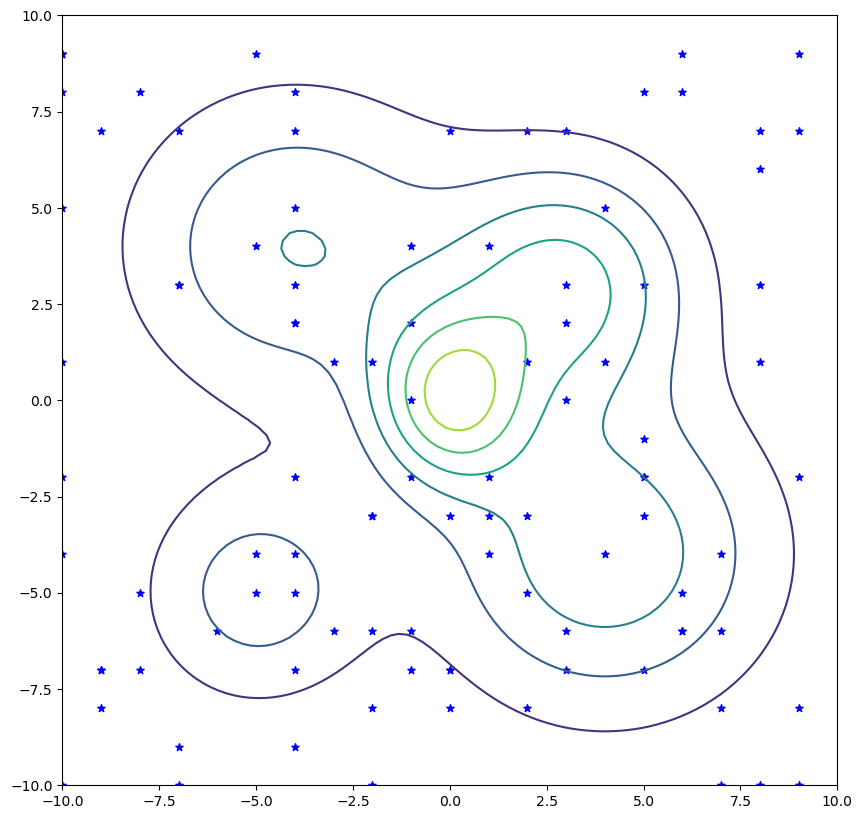

.

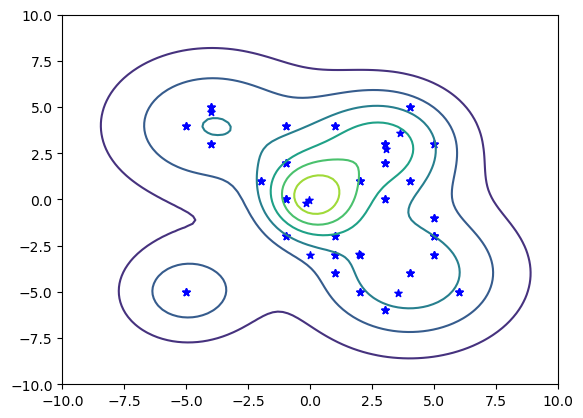

.

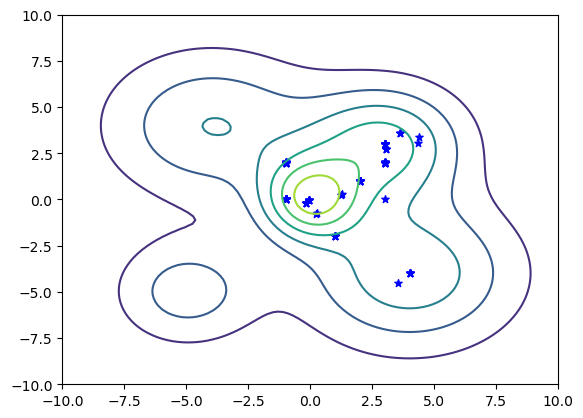

.

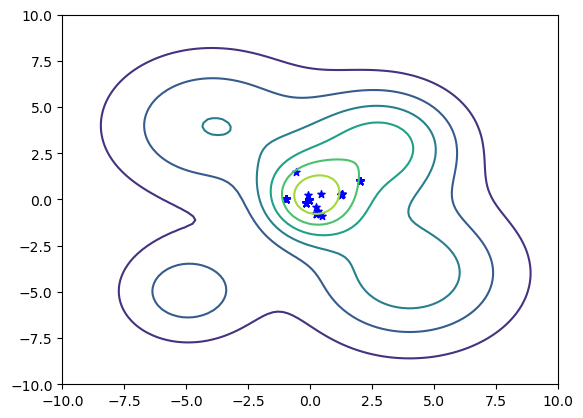

.

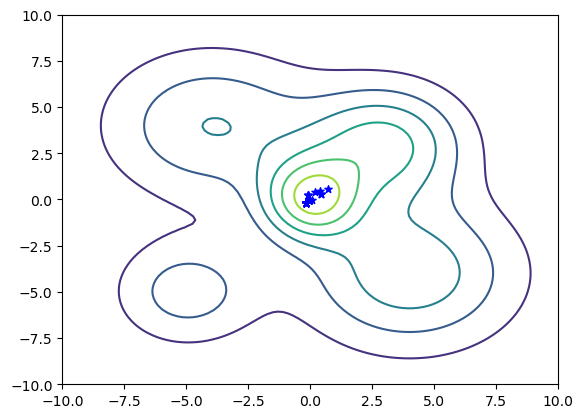

.

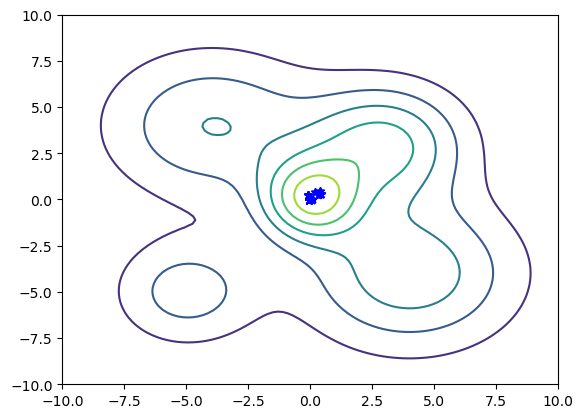

.

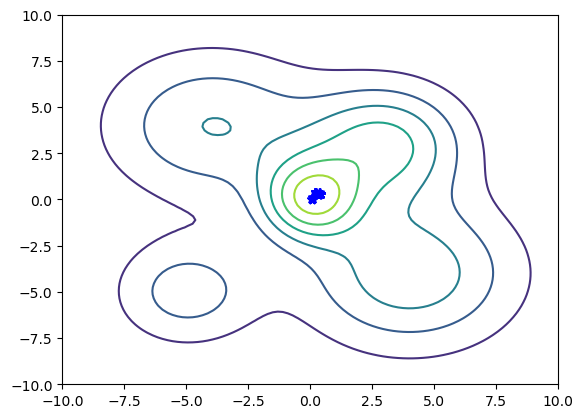

.

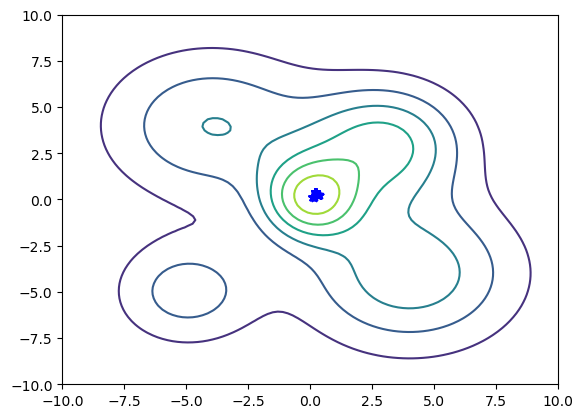

.

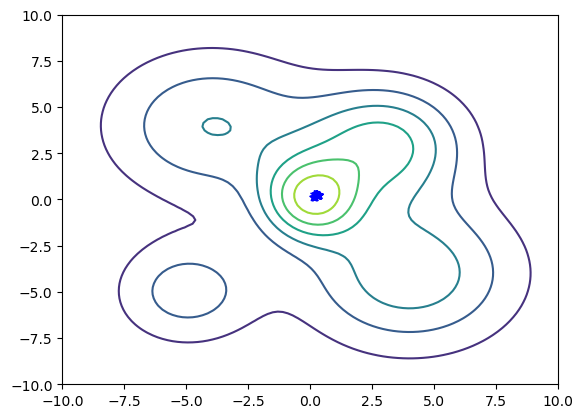

.

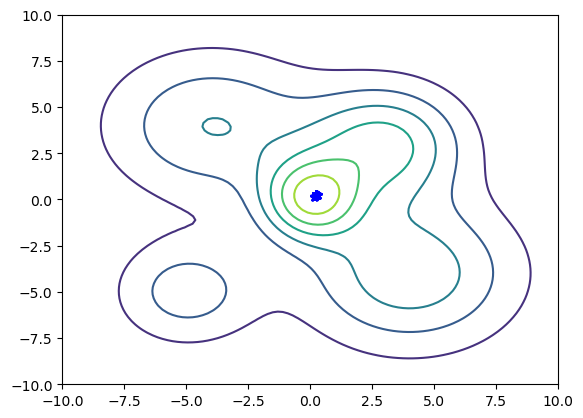

. Done 
Plots are being stored as images iteration wise.. Please Check


In [9]:
stochastic_Search(Smin,Smax,popSize,nRRI,nRRC,radius,maxItr)   
plt.show()